In [26]:
import warnings
# Pour éviter les avertissements lors de l'exécution
warnings.filterwarnings("ignore")

In [27]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration
## Load the Dataset

In [28]:
df = pd.read_csv("./data/fr-esr-parcoursup.csv", sep=';')
df.head()

,session,contrat_etab,cod_uai,g_ea_lib_vx,dep,dep_lib,region_etab_aff,acad_mies,ville_etab,lib_for_voe_ins,...,tri,cod_aff_form,detail_forma2,lien_form_psup,taux_acces_ens,part_acces_gen,part_acces_tec,part_acces_pro,etablissement_id_paysage,composante_id_paysage
0,2023,Public,0212198A,L'institut Agro Dijon,21,Côte-d'Or,Bourgogne-Franche-Comté,Dijon,Dijon,Formation d'ingénieur Bac + 5 - Bac général,...,3_Autres formations,11,Concours Geipi Polytech,https://dossier.parcoursup.fr/Candidats/public...,71.0,100.0,0.0,0.0,MihlE,upGa1
1,2023,Public,0542259M,EEIGM Nancy - Groupe INP,54,Meurthe-et-Moselle,Grand Est,Nancy-Metz,Nancy,Formation d'ingénieur Bac + 5 - Bac général,...,3_Autres formations,21,Concours Geipi Polytech,https://dossier.parcoursup.fr/Candidats/public...,75.0,100.0,0.0,0.0,t6Cq5,9pRyR
2,2023,Public,0580766T,ISAT Nevers,58,Nièvre,Bourgogne-Franche-Comté,Dijon,Nevers,Formation d'ingénieur Bac + 5 - Bac général,...,3_Autres formations,23,Concours Geipi Polytech,https://dossier.parcoursup.fr/Candidats/public...,40.0,100.0,0.0,0.0,NaN,NaN
3,2023,Public,0595868H,IMT Nord Europe,59,Nord,Hauts-de-France,Lille,Villeneuve-d'Ascq,Formation d'ingénieur Bac + 5 - Bac général,...,3_Autres formations,24,Concours Geipi Polytech,https://dossier.parcoursup.fr/Candidats/public...,25.0,100.0,0.0,0.0,NaN,NaN
4,2023,Public,0596610P,Polytech Lille,59,Nord,Hauts-de-France,Lille,Villeneuve-d'Ascq,Formation d'ingénieur Bac + 5 - Bac général,...,3_Autres formations,26,Concours Geipi Polytech,https://dossier.parcoursup.fr/Candidats/public...,46.0,100.0,0.0,0.0,NaN,NaN


In [29]:
print(df.shape)
df.columns

(13869, 118)


Index(['session', 'contrat_etab', 'cod_uai', 'g_ea_lib_vx', 'dep', 'dep_lib',
       'region_etab_aff', 'acad_mies', 'ville_etab', 'lib_for_voe_ins',
       ...
       'tri', 'cod_aff_form', 'detail_forma2', 'lien_form_psup',
       'taux_acces_ens', 'part_acces_gen', 'part_acces_tec', 'part_acces_pro',
       'etablissement_id_paysage', 'composante_id_paysage'],
      dtype='object', length=118)

<Axes: >

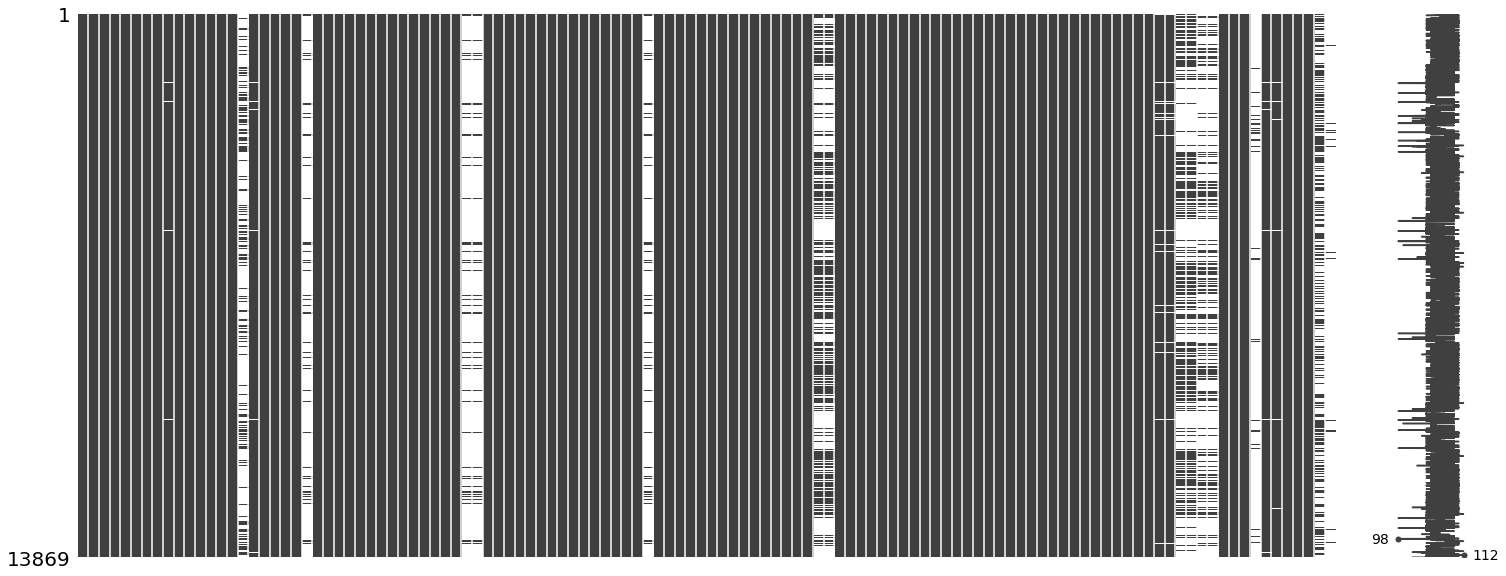

In [30]:
# Missingness
msno.matrix(df)

In [31]:
df.describe()

,session,capa_fin,voe_tot,voe_tot_f,nb_voe_pp,nb_voe_pp_internat,nb_voe_pp_bg,nb_voe_pp_bg_brs,nb_voe_pp_bt,nb_voe_pp_bt_brs,...,prop_tot_bp_brs,prop_tot_at,ran_grp1,ran_grp2,ran_grp3,cod_aff_form,taux_acces_ens,part_acces_gen,part_acces_tec,part_acces_pro
count,13869.0,13869.000000,13869.000000,13869.000000,13869.000000,983.000000,13869.000000,13869.000000,13869.000000,13869.000000,...,13869.000000,13869.000000,13580.000000,6204.000000,3840.000000,13869.000000,13741.000000,13869.000000,13869.000000,13869.000000
mean,2023.0,55.607542,876.034105,488.592833,850.855649,566.116989,450.192732,70.717572,116.456846,36.477324,...,7.314514,59.782320,567.949853,75.709542,82.308333,16660.305285,60.712685,57.593698,24.528445,16.949888
std,0.0,103.047216,1342.470112,878.974400,1343.467441,763.553736,969.733333,145.483652,206.635912,72.660943,...,12.244458,117.344549,1356.010367,100.698768,81.107014,11513.436731,28.493103,34.197917,21.102614,21.654737
min,2023.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,2023.0,20.000000,187.000000,68.000000,168.000000,63.000000,29.000000,5.000000,14.000000,3.000000,...,0.000000,9.000000,39.000000,23.000000,30.000000,6761.000000,37.000000,25.000000,5.000000,0.000000
50%,2023.0,32.000000,421.000000,199.000000,392.000000,318.000000,110.000000,21.000000,47.000000,12.000000,...,3.000000,21.000000,118.000000,46.000000,59.000000,11811.000000,61.000000,60.000000,22.000000,6.000000
75%,2023.0,50.000000,945.000000,498.000000,906.000000,755.000000,442.000000,73.000000,124.000000,36.000000,...,10.000000,52.000000,441.000000,86.000000,107.000000,26185.000000,88.000000,91.000000,40.000000,30.000000
max,2023.0,3400.000000,17747.000000,10402.000000,17747.000000,5821.000000,16187.000000,2315.000000,3218.000000,1448.000000,...,163.000000,1989.000000,16854.000000,1644.000000,928.000000,42727.000000,100.000000,100.000000,100.000000,100.000000


In [32]:
# For numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# For categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

## Categorical features

In [33]:
df[categorical_features].nunique().sort_values()

list_com                              2
select_form                           2
tri                                   3
contrat_etab                          4
lib_grp3                              4
lib_grp2                              6
lib_grp1                              6
fili                                 11
region_etab_aff                      21
acad_mies                            32
form_lib_voe_acc                     52
composante_id_paysage                98
dep_lib                             104
dep                                 104
detail_forma2                       109
fil_lib_voe_acc                     458
etablissement_id_paysage            485
ville_etab                         1272
detail_forma                       2766
lib_for_voe_ins                    3207
g_ea_lib_vx                        3602
cod_uai                            3965
g_olocalisation_des_formations     5789
lib_comp_voe_ins                  11716
lien_form_psup                    13780


## Labels
The target variable is in the column select_form since we classify selectivity of higher education programs.

In [34]:
df.select_form.unique().shape, df.select_form.unique()

((2,), array(['formation sélective', 'formation non sélective'], dtype=object))

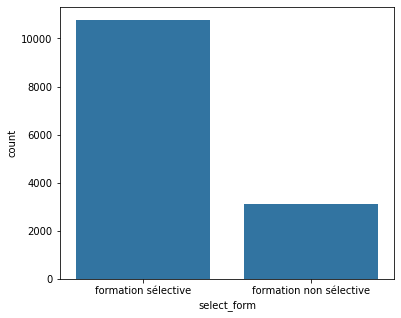

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.countplot(x='select_form', data=df, ax=ax)
plt.show()

Data isn't balanced

In [36]:
# Distribution of groups in each class
group_class_counts = df.groupby(['select_form', 'fili']).size().reset_index(name='counts')
group_class_counts

,select_form,fili,counts
0,formation non sélective,Licence,2291
1,formation non sélective,Licence_Las,535
2,formation non sélective,PASS,278
3,formation sélective,Autre formation,1749
4,formation sélective,BTS,5339
5,formation sélective,BUT,816
6,formation sélective,CPGE,983
7,formation sélective,EFTS,231
8,formation sélective,Ecole d'Ingénieur,472
9,formation sélective,Ecole de Commerce,208


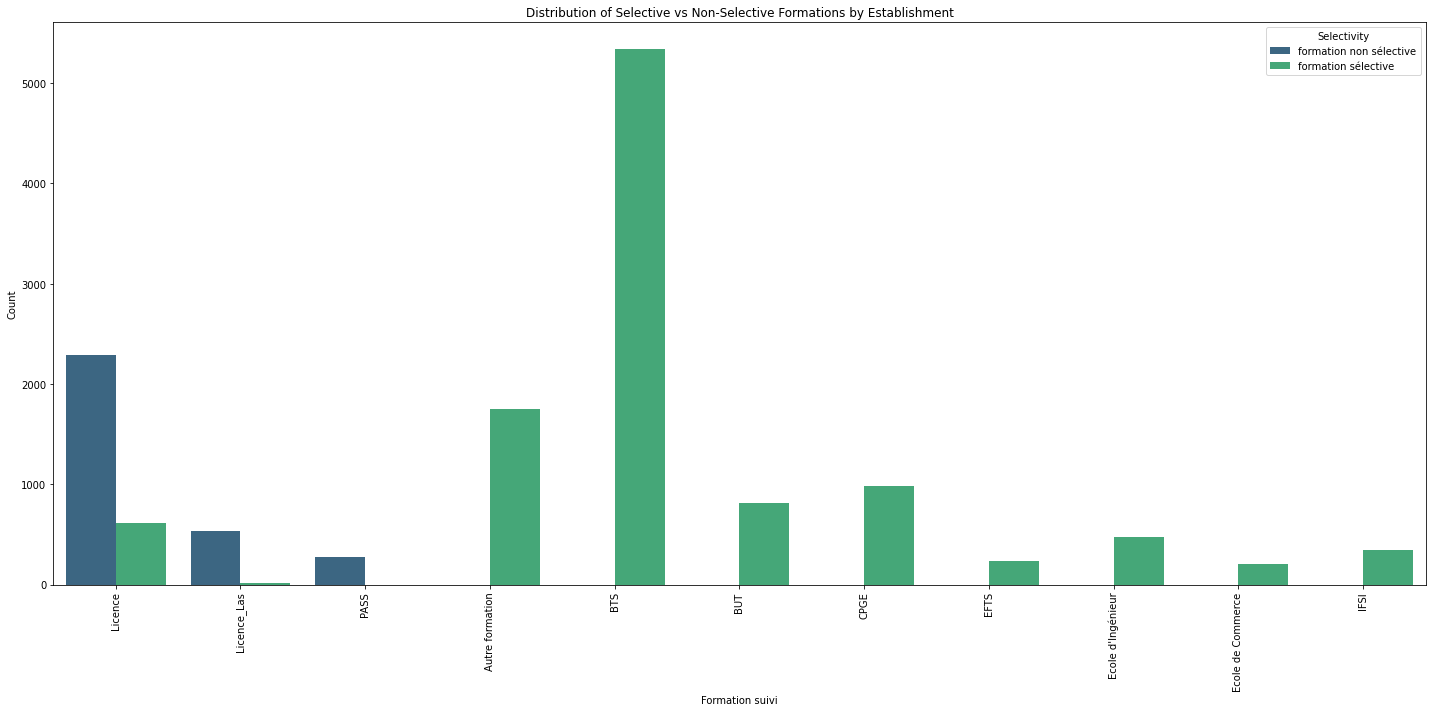

In [37]:
plt.figure(figsize=(20, 10))
sns.barplot(x='fili', y='counts', hue='select_form', data=group_class_counts, palette='viridis')
plt.title('Distribution of Selective vs Non-Selective Formations by Establishment')
plt.xticks(rotation=90) 
plt.xlabel('Formation suivi')
plt.ylabel('Count')
plt.legend(title='Selectivity')
plt.tight_layout() 
plt.show()

Data is severely unbalance we have to create new system labeling in order to perform classification tasks

In [38]:
numerical_features

['session',
 'capa_fin',
 'voe_tot',
 'voe_tot_f',
 'nb_voe_pp',
 'nb_voe_pp_internat',
 'nb_voe_pp_bg',
 'nb_voe_pp_bg_brs',
 'nb_voe_pp_bt',
 'nb_voe_pp_bt_brs',
 'nb_voe_pp_bp',
 'nb_voe_pp_bp_brs',
 'nb_voe_pp_at',
 'nb_voe_pc',
 'nb_voe_pc_bg',
 'nb_voe_pc_bt',
 'nb_voe_pc_bp',
 'nb_voe_pc_at',
 'nb_cla_pp',
 'nb_cla_pc',
 'nb_cla_pp_internat',
 'nb_cla_pp_pasinternat',
 'nb_cla_pp_bg',
 'nb_cla_pp_bg_brs',
 'nb_cla_pp_bt',
 'nb_cla_pp_bt_brs',
 'nb_cla_pp_bp',
 'nb_cla_pp_bp_brs',
 'nb_cla_pp_at',
 'prop_tot',
 'acc_tot',
 'acc_tot_f',
 'acc_pp',
 'acc_pc',
 'acc_debutpp',
 'acc_datebac',
 'acc_finpp',
 'acc_internat',
 'acc_brs',
 'acc_neobac',
 'acc_bg',
 'acc_bt',
 'acc_bp',
 'acc_at',
 'acc_mention_nonrenseignee',
 'acc_sansmention',
 'acc_ab',
 'acc_b',
 'acc_tb',
 'acc_tbf',
 'acc_bg_mention',
 'acc_bt_mention',
 'acc_bp_mention',
 'acc_term',
 'acc_term_f',
 'acc_aca_orig',
 'acc_aca_orig_idf',
 'pct_acc_debutpp',
 'pct_acc_datebac',
 'pct_acc_finpp',
 'pct_f',
 'pct_aca_o

In [39]:
def categorize_by_access_rate(row, low_threshold, high_threshold):
    if row['taux_acces_ens'] > high_threshold:
        return 'non selective'
    elif low_threshold < row['taux_acces_ens'] <= high_threshold:
        return 'peu selective'
    else:
        return 'très selective'

In [69]:
# Example thresholds
low_threshold = 35 # Adjust based on analysis
high_threshold = 80  # Adjust based on analysis
df = df.dropna(subset=['taux_acces_ens'])
# Assuming df has a 'Taux d’accès' column
df['selectivity_category'] = df.apply(lambda row: categorize_by_access_rate(row, low_threshold, high_threshold), axis=1)

In [41]:
df.selectivity_category.unique().shape, df.selectivity_category.unique()

((3,),
 array(['non selective', 'peu selective', 'très selective'], dtype=object))

<Axes: >

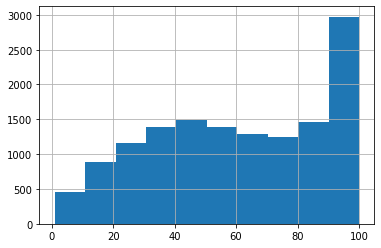

In [42]:
df['taux_acces_ens'].hist()

<Axes: >

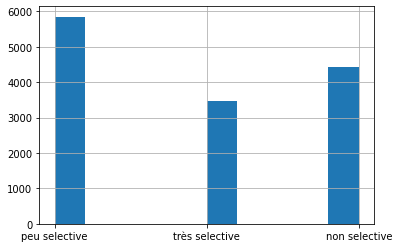

In [68]:
df['selectivity_category'].hist()

In [44]:
# This will add a new column for debugging purposes
df['category_debug'] = df['taux_acces_ens'].apply(lambda x: 'non selective' if x > high_threshold
                                                  else ('peu selective' if low_threshold < x <= high_threshold
                                                        else 'très selective' if pd.notnull(x) else 'missing'))

# Check the value counts for the debug column to understand the distribution
category_counts = df['category_debug'].value_counts()

In [45]:
category_counts

category_debug
non selective     5681
peu selective     5547
très selective    2513
Name: count, dtype: int64